# TEST 4 - Question 3
## Student: Luis Vasquez
___

### **(8 pts.) Using the Boston data set:**
```python
# importing dataset
from sklearn.datasets import load_boston
dataset = load_boston()
```
fit classification models in order to predict whether a given suburb has a crime
rate above or below the median.

In [1]:
# Preparing dataset
from sklearn.datasets import load_boston
dataset = load_boston()

In [2]:
import pandas as pd
import numpy as np

x = dataset['data']
y = dataset['target']
features_names = list(dataset.feature_names) + ['MEDV']
full_data = np.c_[x, y]
boston_df = pd.DataFrame(full_data, columns=features_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# Creating median-wise binary feature for CRIM:
boston_df['CRIM_MEAN'] = boston_df['CRIM'].apply(lambda x: 1 if x > boston_df['CRIM'].median() else 0)
boston_df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_MEAN
59,0.10328,25.0,5.13,0.0,0.4530,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6,0
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2,1
489,0.18337,0.0,27.74,0.0,0.6090,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0,0
278,0.07978,40.0,6.41,0.0,0.4470,6.482,32.1,4.1403,4.0,254.0,17.6,396.90,7.19,29.1,0
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76,45.4,0
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4,0
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1,1
502,0.04527,0.0,11.93,0.0,0.5730,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0
40,0.03359,75.0,2.95,0.0,0.4280,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9,0


### **(a) (2 pts.) Explore KNN models using various subsets of the predictors.**

In [4]:
# Getting an idea of what features to use

boston_df.corr()['CRIM_MEAN'].abs().nlargest(6)

CRIM_MEAN    1.000000
NOX          0.723235
RAD          0.619786
DIS          0.616342
AGE          0.613940
TAX          0.608741
Name: CRIM_MEAN, dtype: float64

In [5]:
# Checking unecessary features

features_to_use = boston_df.corr()['CRIM_MEAN'].abs().nlargest(7)
features_to_use = list(features_to_use.index)
#features_to_use.remove('CRIM_MEAN')
features_to_use

['CRIM_MEAN', 'NOX', 'RAD', 'DIS', 'AGE', 'TAX', 'INDUS']

In [6]:
boston_df.corr().loc[features_to_use][features_to_use].abs()

,CRIM_MEAN,NOX,RAD,DIS,AGE,TAX,INDUS
CRIM_MEAN,1.000000,0.723235,0.619786,0.616342,0.613940,0.608741,0.603260
NOX,0.723235,1.000000,0.611441,0.769230,0.731470,0.668023,0.763651
RAD,0.619786,0.611441,1.000000,0.494588,0.456022,0.910228,0.595129
DIS,0.616342,0.769230,0.494588,1.000000,0.747881,0.534432,0.708027
AGE,0.613940,0.731470,0.456022,0.747881,1.000000,0.506456,0.644779
TAX,0.608741,0.668023,0.910228,0.534432,0.506456,1.000000,0.720760
INDUS,0.603260,0.763651,0.595129,0.708027,0.644779,0.720760,1.000000


**RAD & TAX are excesively related** (drop TAX)

In [7]:
features_to_use.remove('TAX')

In [8]:
boston_df.corr()['CRIM_MEAN'][features_to_use]

CRIM_MEAN    1.000000
NOX          0.723235
RAD          0.619786
DIS         -0.616342
AGE          0.613940
INDUS        0.603260
Name: CRIM_MEAN, dtype: float64

In [9]:
subset_1 = ['CRIM_MEAN', 'NOX', 'RAD']
subset_2 = ['CRIM_MEAN', 'NOX', 'DIS']
subset_3 = ['CRIM_MEAN', 'RAD', 'DIS', 'AGE']
subset_4 = ['CRIM_MEAN', 'RAD', 'DIS', 'INDUS']
subset_all = features_to_use

subsets = [subset_1, subset_2, subset_3, subset_4, subset_all]
subsets

[['CRIM_MEAN', 'NOX', 'RAD'],
 ['CRIM_MEAN', 'NOX', 'DIS'],
 ['CRIM_MEAN', 'RAD', 'DIS', 'AGE'],
 ['CRIM_MEAN', 'RAD', 'DIS', 'INDUS'],
 ['CRIM_MEAN', 'NOX', 'RAD', 'DIS', 'AGE', 'INDUS']]

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [11]:
# Matrix display function, not from my authorship (found after an arbitrary stackoverflow search)
def conf_matrix_display(conf_matrix):
    confusion_df = pd.DataFrame({'$\hat{y}$=0': np.append(conf_matrix[:, 0], conf_matrix.sum(axis=0)[0]),
                                 '$\hat{y}$=1': np.append(conf_matrix[:, 1], conf_matrix.sum(axis=0)[1]),
                                 'Total': np.append(conf_matrix.sum(axis=1), ''),
                                 '': ['$y$=0', '$y$=1', 'Total']}).set_index('')
    return confusion_df

for subset in subsets:
    to_use_df = boston_df.loc[:,subset]
    x = to_use_df.loc[:, to_use_df.columns != 'CRIM_MEAN']
    y = to_use_df.loc[:, 'CRIM_MEAN']
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17) # As specified in test indic.
    
    knn = KNeighborsClassifier().fit(x_train, y_train)
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    conf_matrix = confusion_matrix(knn.predict(x_test), y_test)
    print(f"Subset of predictors: {subset}")
    print(f">> Train score:{train_score}")
    print(f">> Test score:{test_score}")
    print(">> Confusion matrix (test)")
    display(conf_matrix_display(conf_matrix))
    print("*"*40)

Subset of predictors: ['CRIM_MEAN', 'NOX', 'RAD']
>> Train score:0.9604221635883905
>> Test score:0.9606299212598425
>> Confusion matrix (test)


,$\hat{y}$=0,$\hat{y}$=1,Total
,,,
$y$=0,67,5,72
$y$=1,0,55,55
Total,67,60,


****************************************
Subset of predictors: ['CRIM_MEAN', 'NOX', 'DIS']
>> Train score:0.9050131926121372
>> Test score:0.8582677165354331
>> Confusion matrix (test)


,$\hat{y}$=0,$\hat{y}$=1,Total
,,,
$y$=0,57,8,65
$y$=1,10,52,62
Total,67,60,


****************************************
Subset of predictors: ['CRIM_MEAN', 'RAD', 'DIS', 'AGE']
>> Train score:0.8654353562005277
>> Test score:0.8110236220472441
>> Confusion matrix (test)


,$\hat{y}$=0,$\hat{y}$=1,Total
,,,
$y$=0,56,13,69
$y$=1,11,47,58
Total,67,60,


****************************************
Subset of predictors: ['CRIM_MEAN', 'RAD', 'DIS', 'INDUS']
>> Train score:0.9630606860158312
>> Test score:0.9606299212598425
>> Confusion matrix (test)


,$\hat{y}$=0,$\hat{y}$=1,Total
,,,
$y$=0,67,5,72
$y$=1,0,55,55
Total,67,60,


****************************************
Subset of predictors: ['CRIM_MEAN', 'NOX', 'RAD', 'DIS', 'AGE', 'INDUS']
>> Train score:0.9155672823218998
>> Test score:0.84251968503937
>> Confusion matrix (test)


,$\hat{y}$=0,$\hat{y}$=1,Total
,,,
$y$=0,57,10,67
$y$=1,10,50,60
Total,67,60,


****************************************


#### It seems that the best results (for both training and testing) happens when using **subset = ['CRIM_MEAN', 'RAD', 'DIS', 'INDUS']**

___
### **(b) (2 pts.) Explore different Values of K in order to find the optimal one.**

In [12]:
features = ['CRIM_MEAN', 'RAD', 'DIS', 'INDUS']
params = {'n_neighbors': range(2,15)}

to_use_df = boston_df.loc[:,features]
x = to_use_df.loc[:, to_use_df.columns != 'CRIM_MEAN']
y = to_use_df.loc[:, 'CRIM_MEAN']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17) # As specified in test indic.

In [13]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(), params, cv=5, n_jobs=-1, verbose=True)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1, param_grid={'n_neighbors': range(2, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [14]:
print("Optim. K:", clf.best_params_['n_neighbors'])
print("CV Best score:",clf.best_score_)

Optim. K: 4
CV Best score: 0.9656992084432717


In [15]:
# Checking for testing subset
knn = KNeighborsClassifier(**clf.best_params_)
knn.fit(x_train, y_train)
print("Score (Train):", knn.score(x_train, y_train))
print("Score (Test):", knn.score(x_test, y_test))
conf_matrix = confusion_matrix(knn.predict(x_test), y_test)
display(conf_matrix_display(conf_matrix))

Score (Train): 0.9656992084432717
Score (Test): 0.952755905511811


,$\hat{y}$=0,$\hat{y}$=1,Total
,,,
$y$=0,67,6,73
$y$=1,0,54,54
Total,67,60,


In [16]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003897,0.000402,0.007885,0.001357,2,{'n_neighbors': 2},0.948052,0.986842,0.947368,0.933333,0.960000,0.955145,0.017962,5
1,0.003571,0.000158,0.010761,0.004919,3,{'n_neighbors': 3},0.935065,0.986842,0.934211,0.906667,0.973333,0.947230,0.028968,8
2,0.003489,0.000216,0.006721,0.000427,4,{'n_neighbors': 4},0.961039,0.986842,0.960526,0.933333,0.986667,0.965699,0.019842,1
3,0.003605,0.000603,0.007768,0.001835,5,{'n_neighbors': 5},0.961039,0.973684,0.947368,0.920000,0.986667,0.957784,0.022852,4
4,0.003259,0.000452,0.009012,0.003887,6,{'n_neighbors': 6},0.961039,0.986842,0.960526,0.946667,0.973333,0.965699,0.013514,1
5,0.003557,0.000418,0.009518,0.004083,7,{'n_neighbors': 7},0.948052,0.973684,0.947368,0.933333,0.973333,0.955145,0.015839,5
6,0.003206,0.000065,0.006750,0.000294,8,{'n_neighbors': 8},0.948052,0.986842,0.947368,0.946667,0.973333,0.960422,0.016603,3
7,0.003019,0.000243,0.006481,0.000922,9,{'n_neighbors': 9},0.948052,0.973684,0.934211,0.920000,0.986667,0.952507,0.024518,7
8,0.003648,0.001667,0.006772,0.000517,10,{'n_neighbors': 10},0.948052,0.947368,0.921053,0.920000,0.973333,0.941953,0.019781,9
9,0.003064,0.000117,0.006040,0.001084,11,{'n_neighbors': 11},0.922078,0.947368,0.921053,0.880000,0.986667,0.931398,0.034893,11


### **(c) (2 pts.) Make some plots to back up your assertions.**

In [17]:
from IPython.core.display import display, HTML

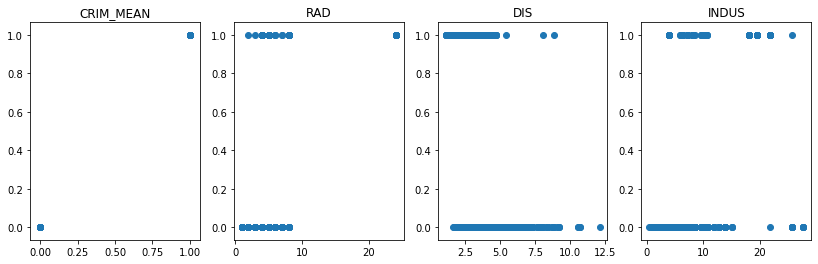

In [18]:
fig, axs = plt.subplots(1,4, figsize=(14,4))

display(HTML('<center><h2>Behavior between features vs CRIM_MEAN</h2></center>'))

for f, ax in zip(features, axs):
    ax.scatter(to_use_df[f], to_use_df['CRIM_MEAN'])
    ax.set_title(f)

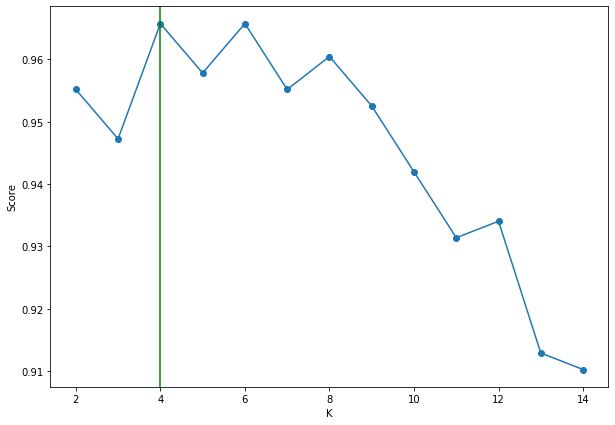

In [19]:
display(HTML('<center><h2>CV result exploring plot</h2></center>'))
plt.figure(figsize=(10,7))
plt.plot(cv_results.param_n_neighbors, cv_results.mean_test_score, marker='o')
plt.axvline(clf.best_params_['n_neighbors'], c='g', label='optim')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

### **(d) (2 pts.) Make some comments or conclusions from your findings.**

The results to emphasize come from the results of the correlation in question (a). This analysis is what actually prioritized the optimization of the Grid Search, looking exclusively for those features that resembles what is needed to identify an instance grouped above or below the median of crime rate. 